# FUNDAMENTALS OF DATA ANALYSIS WITH PYTHON <br><font color="crimson">DAY 4: DATA VISUALIZATION</font>

49th [GESIS Spring Seminar: Digital Behavioral Data](https://training.gesis.org/?site=pDetails&pID=0xA33E4024A2554302B3EF4AECFC3484FD)   
Cologne, Germany, March 2-6 2010

### Course Developers and Instructors 

* Dr. [John McLevey](www.johnmclevey.com), University of Waterloo (john.mclevey@uwaterloo.ca)     
* [Jillian Anderson](https://ca.linkedin.com/in/jillian-anderson-34435714a?challengeId=AQGaFXECVnyVqAAAAW_TLnwJ9VHAlBfinArnfKV6DqlEBpTIolp6O2Bau4MmjzZNgXlHqEIpS5piD4nNjEy0wsqNo-aZGkj57A&submissionId=16582ced-1f90-ec15-cddf-eb876f4fe004), Simon Fraser University (jillianderson8@gmail.com) 

<hr>

### Overview 

High-level overview coming soon... 

### Plan for the Day

1. ...

<hr>

In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' # better resolution with vector graphics! 

In [2]:
data_dir = os.listdir('data/russian-troll-tweets')
files = [f for f in data_dir if 'csv' in f]
df = pd.concat((pd.read_csv('data/russian-troll-tweets/{}'.format(f), encoding='utf-8', low_memory=False) for f in files if 'csv' in f))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2946207 entries, 0 to 239349
Data columns (total 21 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   external_author_id  object
 1   author              object
 2   content             object
 3   region              object
 4   language            object
 5   publish_date        object
 6   harvested_date      object
 7   following           int64 
 8   followers           int64 
 9   updates             int64 
 10  post_type           object
 11  account_type        object
 12  retweet             int64 
 13  account_category    object
 14  new_june_2018       int64 
 15  alt_external_id     object
 16  tweet_id            int64 
 17  article_url         object
 18  tco1_step1          object
 19  tco2_step1          object
 20  tco3_step1          object
dtypes: int64(6), object(15)
memory usage: 494.5+ MB


In [3]:
sampled = df.sample(5000) # we will pull a random sampling to help with overplotting and to avoid slowing down the browser

> **NOTE**: I have content for all sections below. I am just moving stuff around to improve the narrative flow. I've temporarily moved content into another notebook and am putting the pieces back here as go! I'm starting with code and will add narrative text later. 

# PRINCIPLES FOR PRODUCING HIGH-QUALITY VISUALIZATIONS

# AN OBJECT-ORIENTED APPROACH TO VISUALIZATION

## Anatomy of a Plot

# DEVELOP VISUALIZATIONS ITERATIVELY

# BAR GRAPHS

In [4]:
cat_counts = sampled.groupby('account_category').size()
cat_counts

account_category
Commercial       209
Fearmonger        23
HashtagGamer     421
LeftTroll        698
NewsFeed        1005
NonEnglish      1372
RightTroll      1248
Unknown           24
dtype: int64

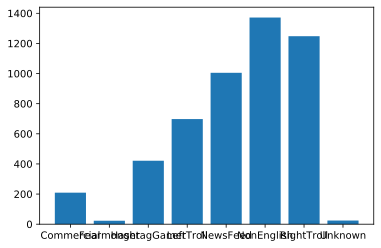

In [5]:
fig, ax = plt.subplots()
ax.bar(cat_counts.index, cat_counts)
plt.show()

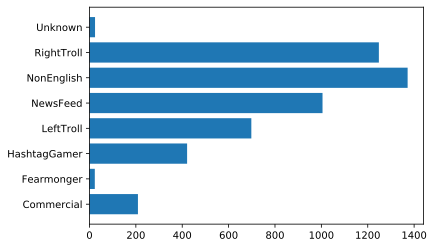

In [6]:
fig, ax = plt.subplots()
ax.barh(cat_counts.index, cat_counts)
plt.show()

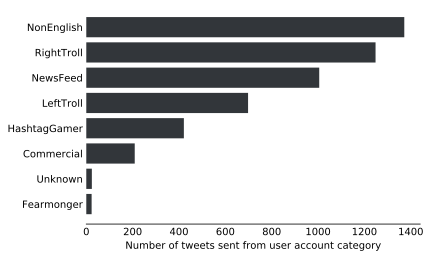

In [7]:
# reorder the series to reorder our bars
cat_counts = cat_counts.sort_values(ascending=True)

# initialize our figure and axes objects 
fig, ax = plt.subplots()

# draw the horizontal bars
ax.barh(cat_counts.index, cat_counts, color = '#32363A')

# add an xlabel 
ax.set_xlabel('Number of tweets sent from user account category')

# remove spines for top, right, and left 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# remove the tick marks on the left, but leave the labels
ax.tick_params(axis='both', which='both', length=0)

plt.show()

# CLEVELAND DOT PLOTS

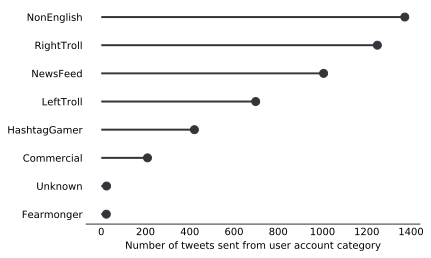

In [8]:
# reorder the series to reorder our bars
cat_counts = cat_counts.sort_values(ascending=True)

# initialize our figure and axes objects 
fig, ax = plt.subplots()

# draw the dots and horizontal lines
# this is the only part of this graph that differs from the horizontal bar chart above
ax.hlines(y=cat_counts.index, xmin=0, xmax=cat_counts, color='#32363A', linewidth=2)
ax.plot(cat_counts, cat_counts.index, "o", color='#32363A', markersize = 8)

# add an xlabel 
ax.set_xlabel('Number of tweets sent from user account category')

# remove spines for top, right, and left 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# remove the tick marks on the left, but leave the labels
ax.tick_params(axis='both', which='both', length=0)

plt.show()

# STRIP PLOTS

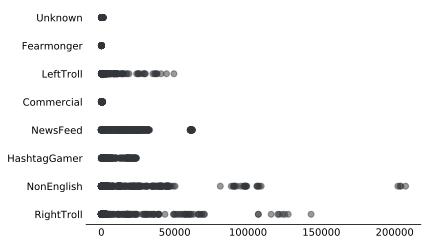

In [9]:
fig, ax = plt.subplots()
ax.scatter(sampled['followers'], sampled['account_category'], color='#32363A', alpha = .5)

# remove spines for top, right, and left 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# remove the tick marks on the left, but leave the labels
ax.tick_params(axis='both', which='both', length=0)

plt.show()

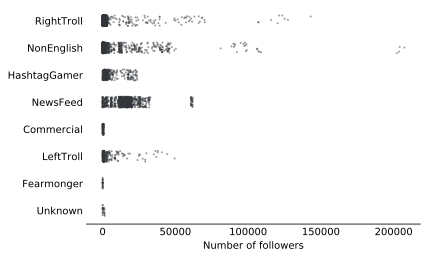

In [10]:
fig, ax = plt.subplots()
# matplotlib doesn't have a convenient jitter parameter, so we will use seaborn 
sns.stripplot(sampled['followers'], sampled['account_category'], color='#32363A', alpha = .5, jitter=0.2, size=2)

# remove spines for top, right, and left 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# remove the tick marks on the left, but leave the labels
ax.tick_params(axis='both', which='both', length=0)

ax.set_ylabel('')
ax.set_xlabel('Number of followers')

plt.show()

# BOXPLOTS

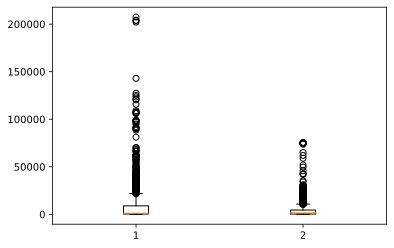

In [11]:
fig, ax = plt.subplots()
ax.boxplot([sampled['followers'], sampled['following']])
plt.show()

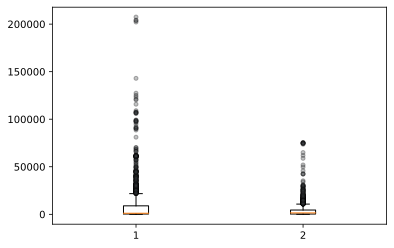

In [12]:
flierprops = dict(marker='o', markerfacecolor='#32363A', markersize=4,linestyle='none', alpha=.3)

fig, ax = plt.subplots()
ax.boxplot([sampled['followers'], sampled['following']], flierprops = flierprops)
plt.show()

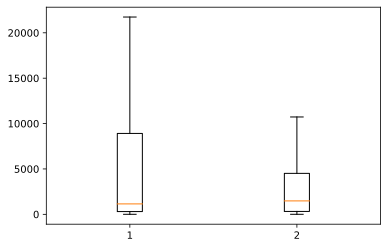

In [13]:
fig, ax = plt.subplots()
ax.boxplot([sampled['followers'], sampled['following']], showfliers=False)
plt.show()

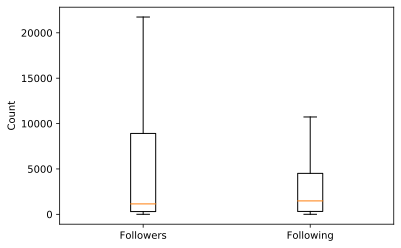

In [14]:
fig, ax = plt.subplots()
ax.boxplot([sampled['followers'], sampled['following']], showfliers=False)
ax.set_xticklabels(['Followers', 'Following'])
ax.set_ylabel('Count')
plt.show()

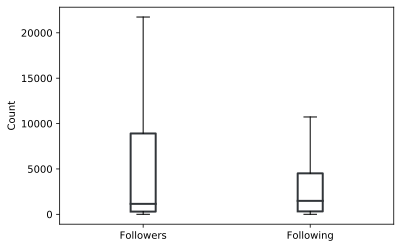

In [15]:
medianprops = dict(linewidth=2, color='#32363A')
boxprops = dict(linewidth=2, color='#32363A')

fig, ax = plt.subplots()
ax.boxplot([sampled['followers'], sampled['following']], showfliers=False, medianprops=medianprops, boxprops=boxprops)
ax.set_xticklabels(['Followers', 'Following'])
ax.set_ylabel('Count')
plt.show()

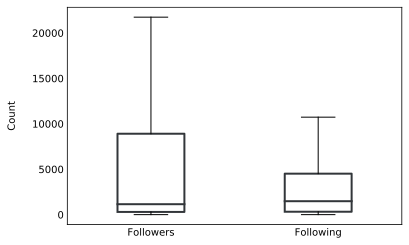

In [16]:
medianprops = dict(linewidth=2, color='#32363A')
boxprops = dict(linewidth=2, color='#32363A')

fig, ax = plt.subplots()
ax.boxplot([sampled['followers'], sampled['following']], 
           showfliers=False, medianprops=medianprops, boxprops=boxprops, widths=.4)

ax.set_xticklabels(['Followers', 'Following'])
ax.set_ylabel('Count\n')

ax.tick_params(axis='both', which='both', length=0)

plt.show()

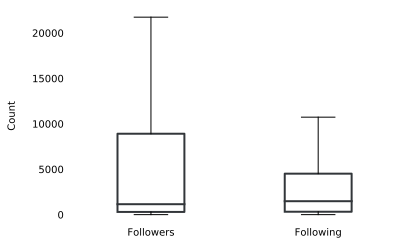

In [17]:
medianprops = dict(linewidth=2, color='#32363A')
boxprops = dict(linewidth=2, color='#32363A')

fig, ax = plt.subplots()
ax.boxplot([sampled['followers'], sampled['following']], 
           showfliers=False, medianprops=medianprops, boxprops=boxprops, widths=.4)

ax.set_xticklabels(['Followers', 'Following'])
ax.set_ylabel('Count\n')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='both', which='both', length=0)

plt.show()

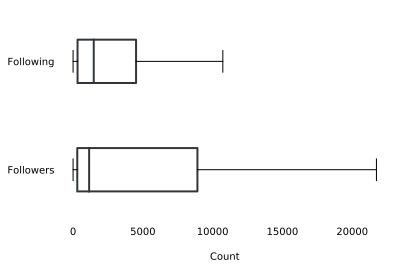

In [18]:
medianprops = dict(linewidth=2, color='#32363A')
boxprops = dict(linewidth=2, color='#32363A')

fig, ax = plt.subplots()

# let's make these horizontal rather than vertical
ax.boxplot([sampled['followers'], sampled['following']], showfliers=False, 
           medianprops=medianprops, boxprops=boxprops, vert=False, widths=.4)

ax.set_yticklabels(['Followers', 'Following'])
ax.set_xlabel('\nCount')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='both', which='both', length=0)

plt.show()

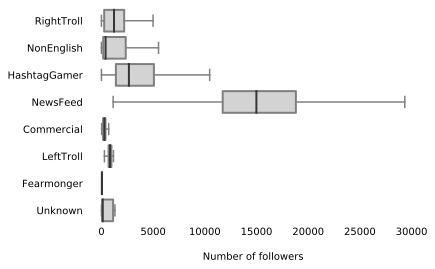

In [19]:
medianprops = dict(linewidth=2, color='#32363A')
boxprops = dict(linewidth=2)

fig, ax = plt.subplots()

# this time we will use seaborn to simplify comparisons
sns.boxplot(x=sampled['followers'], y=sampled['account_category'], orient="h", color='lightgray', 
            showfliers=False, medianprops = medianprops, boxprops = boxprops)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='both', which='both', length=0)

ax.set_xlabel('\nNumber of followers')
ax.set_ylabel('')

plt.show()

In [20]:
wo_newsfeed = sampled[sampled['account_category'] != "NewsFeed"]

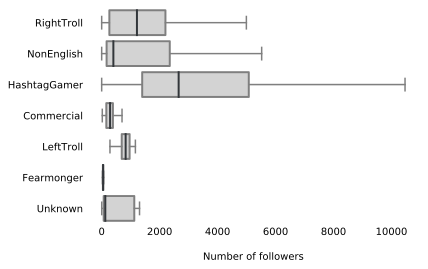

In [21]:
medianprops = dict(linewidth=2, color='#32363A')
boxprops = dict(linewidth=2)

fig, ax = plt.subplots()

# this time we will use seaborn to simplify comparisons
sns.boxplot(x=wo_newsfeed['followers'], y=wo_newsfeed['account_category'], orient="h", color='lightgray', 
            showfliers=False, medianprops = medianprops, boxprops = boxprops)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='both', which='both', length=0)

ax.set_xlabel('\nNumber of followers')
ax.set_ylabel('')

plt.show()


# HISTOGRAMS

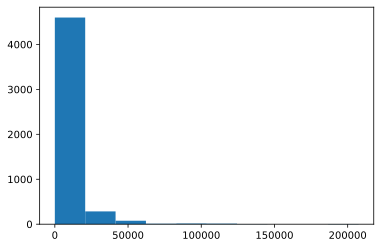

In [22]:
fig, ax = plt.subplots()
ax.hist(sampled['followers'])
plt.show()

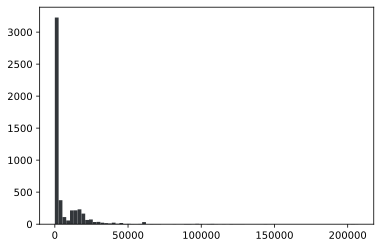

In [23]:
fig, ax = plt.subplots()
ax.hist(sampled['followers'], bins=80, color='#32363A')
plt.show()

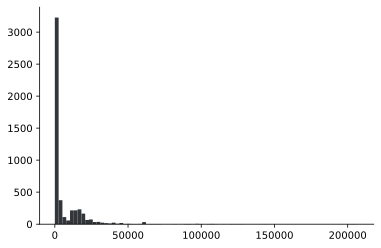

In [24]:
fig, ax = plt.subplots()

ax.hist(sampled['followers'], bins=80, color='#32363A')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [25]:
drop_low = sampled[sampled['followers'] > 50]

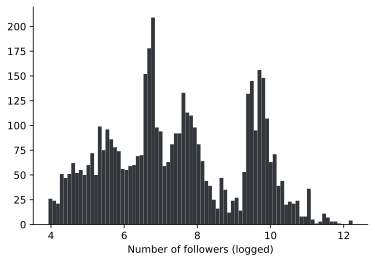

In [26]:
fig, ax = plt.subplots()

ax.hist(np.log(drop_low['followers']), bins=80, color='#32363A')
# ax.hist(np.log(drop_low['following']), bins=120) # throwing errors because of inf values 

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Number of followers (logged)')

plt.show()

In [27]:
# WORKING ON THIS -- WILL BE BETTER ONCE I SOLVE LOG PROBLEM 

# fig, ax = plt.subplots()

# # we can log the x-axis
# ax.hist(df['followers'], bins=120, color='#32363A')
# ax.hist(df['following'], bins=120)

# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

# plt.show()

# SCATTERPLOTS

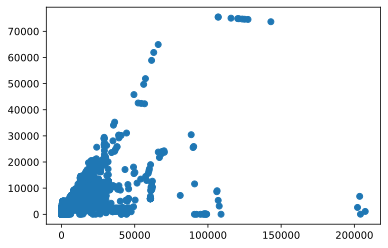

In [28]:
fig, ax = plt.subplots()
ax.scatter(sampled['followers'], sampled['following'])
plt.show()

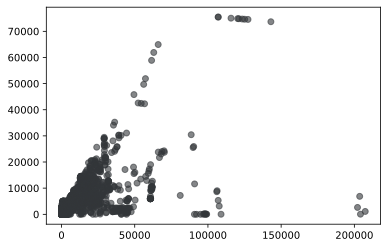

In [29]:
fig, ax = plt.subplots()
ax.scatter(sampled['followers'], sampled['following'], alpha=.6, color='#32363A')
plt.show()

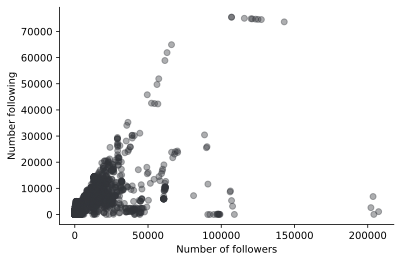

In [30]:
fig, ax = plt.subplots()
ax.scatter(sampled['followers'], sampled['following'], alpha=.4, color='#32363A')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Number of followers')
ax.set_ylabel('Number following')

plt.show()

In [31]:
# this would be OK too with logged axes 
# sns.jointplot(sampled['followers'], sampled['following'], kind="hex", color="#32363A")
# plt.show()

# HEATMAPS

> **NOTE**: This dataset doesn't lend itself very well to this kind of plot until getting to some of the later content (day 5) on unstructured data. Maybe just punt this over there? 

In [32]:
need_other_data_for_this = df.corr() # not actually meaningful matrix 
need_other_data_for_this

following  followers   updates   retweet  new_june_2018  \
following       1.000000   0.580259  0.151950 -0.305094      -0.150726   
followers       0.580259   1.000000  0.233705 -0.312036      -0.049159   
updates         0.151950   0.233705  1.000000 -0.171920       0.119216   
retweet        -0.305094  -0.312036 -0.171920  1.000000       0.116437   
new_june_2018  -0.150726  -0.049159  0.119216  0.116437       1.000000   
tweet_id        0.110589   0.086571  0.149430 -0.027388      -0.353891   

               tweet_id  
following      0.110589  
followers      0.086571  
updates        0.149430  
retweet       -0.027388  
new_june_2018 -0.353891  
tweet_id       1.000000

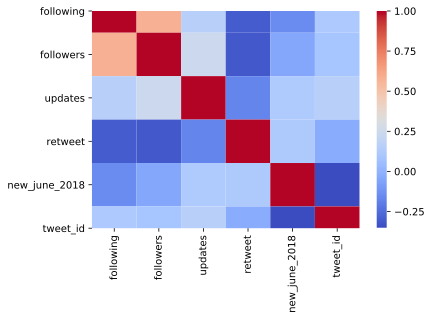

In [33]:
sns.heatmap(need_other_data_for_this, cmap='coolwarm')
ax.tick_params(axis='both', which='both', length=0)
plt.show()

# DENSITY & CONTOUR PLOTS

# PLOTTING TIME SERIES DATA

In [34]:
sampled['publish_date']

139898      8/5/2017 7:46
97244     1/31/2017 17:45
132924    8/20/2015 13:35
82236      2/8/2017 16:49
192697     12/8/2016 3:28
               ...       
91624     12/20/2016 9:15
12584      3/3/2017 18:59
237393    3/26/2016 14:58
201991    2/20/2017 22:46
106364    11/27/2015 0:11
Name: publish_date, Length: 5000, dtype: object

In [35]:
dt = pd.to_datetime(sampled['publish_date'].tolist())
type(dt)

pandas.core.indexes.datetimes.DatetimeIndex

In [36]:
dt

DatetimeIndex(['2017-08-05 07:46:00', '2017-01-31 17:45:00',
               '2015-08-20 13:35:00', '2017-02-08 16:49:00',
               '2016-12-08 03:28:00', '2015-10-17 14:20:00',
               '2015-08-28 13:14:00', '2015-07-11 00:52:00',
               '2017-05-08 21:11:00', '2016-01-04 15:11:00',
               ...
               '2016-02-03 12:03:00', '2016-03-08 08:01:00',
               '2016-10-12 19:56:00', '2017-08-10 12:02:00',
               '2016-08-16 09:07:00', '2016-12-20 09:15:00',
               '2017-03-03 18:59:00', '2016-03-26 14:58:00',
               '2017-02-20 22:46:00', '2015-11-27 00:11:00'],
              dtype='datetime64[ns]', length=5000, freq=None)

In [37]:
dt.day

Int64Index([ 5, 31, 20,  8,  8, 17, 28, 11,  8,  4,
            ...
             3,  8, 12, 10, 16, 20,  3, 26, 20, 27],
           dtype='int64', length=5000)

In [38]:
dt.week

Int64Index([31,  5, 34,  6, 49, 42, 35, 28, 19,  1,
            ...
             5, 10, 41, 32, 33, 51,  9, 12,  8, 48],
           dtype='int64', length=5000)

In [39]:
dt.year

Int64Index([2017, 2017, 2015, 2017, 2016, 2015, 2015, 2015, 2017, 2016,
            ...
            2016, 2016, 2016, 2017, 2016, 2016, 2017, 2016, 2017, 2015],
           dtype='int64', length=5000)

In [40]:
sampled['Year'] = dt.year
sampled['Month'] = dt.month
sampled['Day'] = dt.day

In [41]:
grouped = sampled.groupby(['Year', 'Month', 'Day']).size().sort_values(ascending=False).reset_index()

grouped = grouped.rename(
    columns={0:'Number of (sampled) tweets'}
)

grouped = grouped.sort_values(['Year', 'Month', 'Day'], ascending=True)

In [42]:
grouped.sample(20)

Year  Month  Day  Number of (sampled) tweets
593  2015      3   10                           3
759  2016      6   24                           2
26   2015      7   11                          15
300  2015      8   26                           6
945  2015      9   11                           1
103  2016      2    8                          10
149  2016     11   25                           8
913  2017     11   15                           1
741  2015      6   25                           2
338  2017      2   18                           6
575  2017      3   25                           3
67   2017      3   30                          12
592  2016      1   14                           3
739  2017     11   11                           2
325  2015      9   26                           6
714  2014     12    1                           2
514  2017      4   29                           4
480  2015     12   11                           4
606  2015      9   13                           3
758  2015      1   21                           2

We will produce this plot with the full `dataframe`, so it will take a bit of time. 

Perhaps a good time to take a break for tea and coffee. ☕️☕️☕️

In [43]:
df['Datetime'] = pd.to_datetime(df['publish_date'])
df = df.set_index('Datetime')

Various ways to group by time, see the `pandas` timeseries documentation for further details. 

| Value | Description                                  |
|:------|:---------------------------------------------|
| B     | business day frequency                       |
| C     | custom business day frequency (experimental) |
| D     | calendar day frequency                       |
| W     | weekly frequency                             |
| M     | month end frequency                          |
| BM    | business month end frequency                 |
| CBM   | custom business month end frequency          |
| MS    | month start frequency                        |
| BMS   | business month start frequency               |
| CBMS  | custom business month start frequency        |
| Q     | quarter end frequency                        |
| BQ    | business quarter endfrequency                |
| QS    | quarter start frequency                      |
| BQS   | business quarter start frequency             |
| A     | year end frequency                           |
| BA    | business year end frequency                  |
| AS    | year start frequency                         |
| BAS   | business year start frequency                |
| BH    | business hour frequency                      |
| H     | hourly frequency                             |
| T     | minutely frequency                           |
| S     | secondly frequency                           |
| L     | milliseonds                                  |
| U     | microseconds                                 |
| N     | nanosecondsa                                 |

# ☕️ ☕️ ☕️ Tea / Coffee Break 

In [44]:
grouped_cal_day = df.resample('D').size() # group by calendar day and count the number of tweets

In [45]:
grouped_cal_day

Datetime
2012-02-02     4
2012-02-03     0
2012-02-04     1
2012-02-05     1
2012-02-06     3
              ..
2018-05-26    44
2018-05-27    49
2018-05-28    43
2018-05-29    49
2018-05-30    32
Freq: D, Length: 2310, dtype: int64

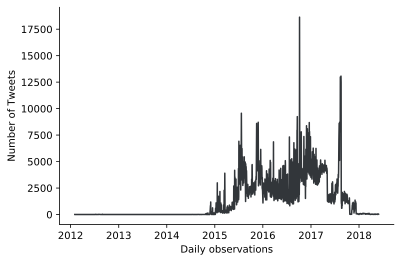

In [46]:
fig, ax = plt.subplots()
ax.plot(grouped_cal_day, color='#32363A')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Daily observations')
ax.set_ylabel('Number of Tweets')

plt.show()

In [47]:
weekly = df.resample('W').size()
weekly

Datetime
2012-02-05      6
2012-02-12     14
2012-02-19      5
2012-02-26     11
2012-03-04      1
             ... 
2018-05-06    178
2018-05-13    150
2018-05-20    145
2018-05-27    346
2018-06-03    124
Freq: W-SUN, Length: 331, dtype: int64

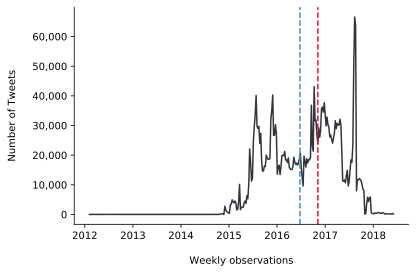

In [48]:
fig, ax = plt.subplots()
ax.plot(weekly, color='#32363A')

# add a vertical line for the 2016 US Presidential election 
ax.axvline(pd.to_datetime('2016-11-06'), color='crimson', linestyle='--', lw=1.5)
# add a veritcal line for the 2016 Brexit referendum 
ax.axvline(pd.to_datetime('2016-06-23'), color='#398ECF', linestyle='--', lw=1.5)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('\nWeekly observations')
ax.set_ylabel('Number of Tweets\n')

# this unpleasant line gives us some nicely formatted numbers for the y axis labels 
# lamda functions are beyond the score of this week long course 
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

# ANNOTATING PLOTS

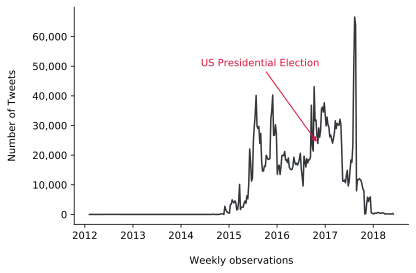

In [49]:
fig, ax = plt.subplots()
ax.plot(weekly, color='#32363A')

# # add a vertical line for the 2016 US Presidential election 
# ax.axvline(pd.to_datetime('2016-11-06'), color='crimson', linestyle='--', lw=1.5)
# # add a veritcal line for the 2016 Brexit referendum 
# ax.axvline(pd.to_datetime('2016-06-23'), color='b', linestyle='--', lw=1.5)

# text annotations
ax.annotate('US Presidential Election', 
            xytext=[pd.Timestamp('2014-06-01'),50000],
            xy=[pd.to_datetime('2016-11-06'), weekly.loc[pd.to_datetime('2016-11-06')]], color='crimson', 
            arrowprops={"arrowstyle":"-|>", "color":"crimson"})

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('\nWeekly observations')
ax.set_ylabel('Number of Tweets\n')

# this unpleasant line gives us some nicely formatted numbers for the y axis labels 
# lamda functions are beyond the score of this week long course 
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

# SMALL MULTIPLES

* quick comparison of doing it in matplotlib vs. seaborn 

# ADDITIONAL CUSTOMIZATIONS

* demonstration of set style
* show how to specify font families and font scale 

# SAVING FIGURES FOR PUBLICATION OR THE WEB

* raster graphics vs. vector graphics 
* `savefig()`
    * png with dpi parameter
    * jpg with quality parameter 
* pdf (for print)
* svg (for vector graphics on the web, for manual customization) 